In [1]:
from google.colab import files
uploaded = files.upload()

Saving ptbxl_database.csv to ptbxl_database.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving scp_statements.csv to scp_statements.csv


Columns in df1: ['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis', 'infarction_stadium1', 'infarction_stadium2', 'validated_by', 'second_opinion', 'initial_autogenerated_report', 'validated_by_human', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr']


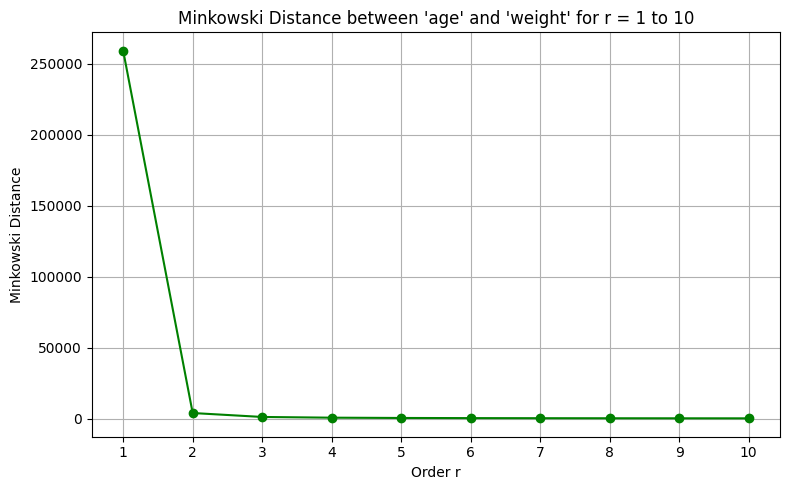

In [17]:
#A3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/ptbxl_database.csv')
df2 = pd.read_csv('/content/scp_statements.csv')

# Merge or use one dataframe depending on structure
# For this example, we'll use df1 assuming it has the required numerical features

# Show column names to help choose features
print("Columns in df1:", df1.columns.tolist())

# Replace 'age' and 'weight' with actual column names present in your Excel
feature1 = 'age'
feature2 = 'weight'

# Drop rows with missing values in selected columns
df = df1.dropna(subset=[feature1, feature2])

# Extract the vectors
vec1 = df[feature1].to_numpy()
vec2 = df[feature2].to_numpy()

# Truncate to equal length (just in case)
min_len = min(len(vec1), len(vec2))
vec1 = vec1[:min_len]
vec2 = vec2[:min_len]

# Calculate Minkowski distances for r = 1 to 10
r_values = list(range(1, 11))
distances = []

for r in r_values:
    powered_diff = np.power(np.abs(vec1 - vec2), r)
    dist = np.sum(powered_diff) ** (1 / r)
    distances.append(dist)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', linestyle='-', color='green')
plt.title(f"Minkowski Distance between '{feature1}' and '{feature2}' for r = 1 to 10")
plt.xlabel("Order r")
plt.ylabel("Minkowski Distance")
plt.grid(True)
plt.xticks(r_values)
plt.tight_layout()
plt.show()


In [3]:
from google.colab import files
uploaded = files.upload()

Saving 01000_lr.dat to 01000_lr.dat
Saving 01000_lr.hea to 01000_lr.hea
Saving 01001_lr.dat to 01001_lr.dat
